https://www.kdca.go.kr/filepath/boardDownload.es?bid=0034&list_no=365521&seq=1

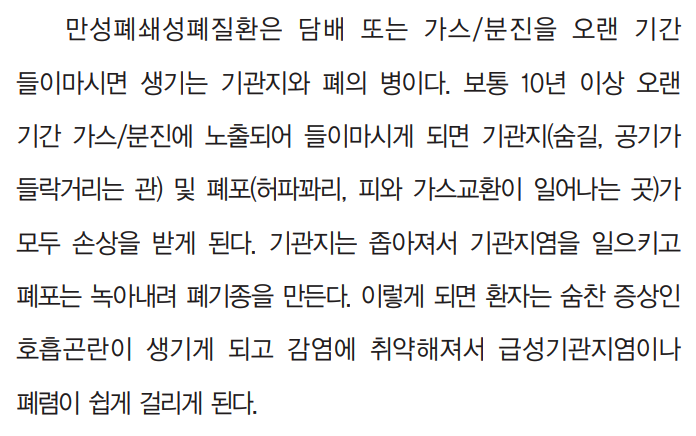

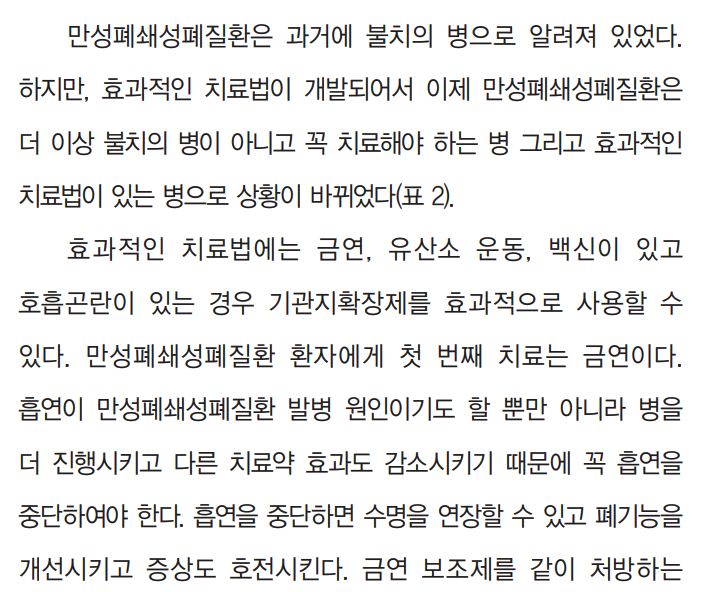

In [327]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

> ID: 일련번호  
(O) AGE: 나이  
(O) PackHistory: 흡연량 (하루에 몇 갑 동안 몇 년 피웠는지 곱한 값)  
(O) COPDSEVERITY: COPD 중증도  
(MILD: 경증, MODERATE: 중등도, SEVERE: 중증, VERY SEVERE: 매우 중증)  
MWT1: 6분 걷기 검사 1차 결과 (MWT1Best와 유사한 의미로 판단되어 제거)  
MWT2: 6분 걷기 검사 2차 결과 (MWT1Best와 유사한 의미로 판단되어 제거)  
(O) MWT1Best: 6분 걷기 검사 최고 거리  
FEV1: 1초 최대 호기량 (FVC와 유사한 의미로 판단되어 제거)  
FEV1PRED: 예측 1초 최대 호기량 (FVC와 유사한 의미로 판단되어 제거) 
(O) FVC: 폐활량 (최대한 숨을 들이쉰 후 최대한 내뱉을 수 있는 )  
FVCPRED: 예측 폐활량 (FVC와 유사한 의미로 판단되어 제거)  
(O) CAT: COPD 평가 검사 점수 (COPD 환자의 증상을 평가하기 위한 설문지 점수)  
(O) HAD: 병원 불안 우울 척도  
SGRQ: 세인트 조지 호흡기 설문지 점수  
(O) AGEquartiles: 나이 사분위수
(1: 1사분위수 미만, 2: 1사분위수 이상 2사분위수 미만
3: 2사분위수 이상, 3사분위수 미만, 4: 3사분위수 이상)  
(O) copd: COPD 유무 (1: Mild, 2: Moderate, 3: Severe, 4: Very severe)  
(O) gender: 성별 (0: 여자, 1: 남자)
(O) smoking: 흡연 상태 (1: 현재 끊은 사람, 2: 현재 흡연자)   
(O) Diabetes: 당뇨병 유무 (1: 있음, 0: 없음)  
(O) muscular: 근육 문제 유무 (1: 있음, 0: 없음)  
(O) hypertension: 고혈압 유무 (1: 있음, 0: 없음)  
(O) AtrialFib: 심방세동 유무 (1: 있음, 0: 없음)  
(O) IHD: 허혈성 심질환 유무 (1: 있음, 0: 없음)  

In [295]:
copd = pd.read_csv('copd.csv')
copd

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,10,68,25.0,MILD,511.0,575.0,575.0,2.70,98.0,...,35.84,2,1,1,2,0,1,0,0,0
97,98,43,75,40.0,MILD,576.0,577.0,577.0,2.90,93.0,...,15.05,3,1,1,2,0,1,0,0,1
98,99,74,68,30.0,MODERATE,468.0,582.0,582.0,1.65,67.0,...,19.70,2,2,0,2,0,0,1,0,0
99,100,108,54,30.0,SEVERE,688.0,699.0,699.0,1.72,44.0,...,20.55,1,3,1,2,0,0,0,0,0


In [296]:
# 중복 데이터 확인
copd.duplicated().sum()

0

> 중복 데이터 없음

### 변수 선별 작업

열이 24개로 너무 많아 중요해보이는 변수들로 추리기  

In [297]:
df = copd.loc[:, ['AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1Best', 'FVC', 'HAD',
             'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes', 'muscular',
             'hypertension', 'AtrialFib', 'IHD']]
df

,AGE,PackHistory,COPDSEVERITY,MWT1Best,FVC,HAD,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,SEVERE,120.0,2.40,8.0,4,3,1,2,1,0,0,1,0
1,79,50.0,MODERATE,176.0,1.64,21.0,4,2,0,2,1,0,0,1,1
2,80,11.0,MODERATE,201.0,2.30,18.0,4,2,0,2,1,0,0,1,0
3,56,60.0,VERY SEVERE,210.0,1.14,26.0,1,4,1,2,0,0,1,1,0
4,65,68.0,SEVERE,210.0,2.91,18.0,1,3,1,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,68,25.0,MILD,575.0,3.87,7.0,2,1,1,2,0,1,0,0,0
97,75,40.0,MILD,577.0,4.72,22.0,3,1,1,2,0,1,0,0,1
98,68,30.0,MODERATE,582.0,2.80,1.0,2,2,0,2,0,0,1,0,0
99,54,30.0,SEVERE,699.0,4.07,10.0,1,3,1,2,0,0,0,0,0


In [298]:
# 결측치 확인
df.isna().sum()

AGE             0
PackHistory     0
COPDSEVERITY    0
MWT1Best        1
FVC             0
HAD             0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [299]:
# MWT1Best 변수의 범주 확인
df['MWT1Best'].value_counts()

MWT1Best
459.0    5
451.0    3
480.0    3
237.0    3
240.0    3
        ..
406.0    1
416.0    1
176.0    1
423.0    1
699.0    1
Name: count, Length: 71, dtype: int64

In [300]:
# MWT1Best 변수의 평균 확인
df['MWT1Best'].mean()

399.11

> MWT1Best 변수의 경우 결측값이 1개이기 때문에 평균값으로 대체

In [301]:
df2 = df.fillna({'MWT1Best' : df['MWT1Best'].mode()[0]})
df2['MWT1Best'].value_counts()

MWT1Best
459.0    6
451.0    3
480.0    3
237.0    3
240.0    3
        ..
406.0    1
416.0    1
176.0    1
423.0    1
699.0    1
Name: count, Length: 71, dtype: int64

In [302]:
# 모든 결측치 처리 완료
df2.isna().sum()

AGE             0
PackHistory     0
COPDSEVERITY    0
MWT1Best        0
FVC             0
HAD             0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

### AGE 변수 범주화

In [303]:
# 나이 최소값 확인
print(df2.loc[:, 'AGE'].min())

# 나이 최대값 확인
print(df2.loc[:, 'AGE'].max())

44
88


In [304]:
# 나이 컬럼 범주화
df2.loc[:, 'AGE']

bins = [0, 50, 60, 70, 80, 90]
labels = ['50세 미만', '50대', '60대', '70대', '80세 이상']
df2['AGE_group'] = pd.cut(df2['AGE'], bins=bins, labels=labels, right=False)
df2

,AGE,PackHistory,COPDSEVERITY,MWT1Best,FVC,HAD,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,AGE_group
0,77,60.0,SEVERE,120.0,2.40,8.0,4,3,1,2,1,0,0,1,0,70대
1,79,50.0,MODERATE,176.0,1.64,21.0,4,2,0,2,1,0,0,1,1,70대
2,80,11.0,MODERATE,201.0,2.30,18.0,4,2,0,2,1,0,0,1,0,80세 이상
3,56,60.0,VERY SEVERE,210.0,1.14,26.0,1,4,1,2,0,0,1,1,0,50대
4,65,68.0,SEVERE,210.0,2.91,18.0,1,3,1,2,0,1,1,0,0,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,68,25.0,MILD,575.0,3.87,7.0,2,1,1,2,0,1,0,0,0,60대
97,75,40.0,MILD,577.0,4.72,22.0,3,1,1,2,0,1,0,0,1,70대
98,68,30.0,MODERATE,582.0,2.80,1.0,2,2,0,2,0,0,1,0,0,60대
99,54,30.0,SEVERE,699.0,4.07,10.0,1,3,1,2,0,0,0,0,0,50대


In [305]:
df2['AGE_group'].value_counts()

AGE_group
70대       49
60대       33
80세 이상    10
50대        7
50세 미만     2
Name: count, dtype: int64

50세 미만의 범주가 너무 적어 50대와 통합

In [306]:
# 나이 컬럼 범주화
df2.loc[:, 'AGE']

bins = [0, 60, 70, 80, 90]
labels = ['60세 미만', '60대', '70대', '80세 이상']
df2['AGE_group'] = pd.cut(df2['AGE'], bins=bins, labels=labels, right=False)
df2

,AGE,PackHistory,COPDSEVERITY,MWT1Best,FVC,HAD,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,AGE_group
0,77,60.0,SEVERE,120.0,2.40,8.0,4,3,1,2,1,0,0,1,0,70대
1,79,50.0,MODERATE,176.0,1.64,21.0,4,2,0,2,1,0,0,1,1,70대
2,80,11.0,MODERATE,201.0,2.30,18.0,4,2,0,2,1,0,0,1,0,80세 이상
3,56,60.0,VERY SEVERE,210.0,1.14,26.0,1,4,1,2,0,0,1,1,0,60세 미만
4,65,68.0,SEVERE,210.0,2.91,18.0,1,3,1,2,0,1,1,0,0,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,68,25.0,MILD,575.0,3.87,7.0,2,1,1,2,0,1,0,0,0,60대
97,75,40.0,MILD,577.0,4.72,22.0,3,1,1,2,0,1,0,0,1,70대
98,68,30.0,MODERATE,582.0,2.80,1.0,2,2,0,2,0,0,1,0,0,60대
99,54,30.0,SEVERE,699.0,4.07,10.0,1,3,1,2,0,0,0,0,0,60세 미만


In [307]:
df2['AGE_group'].value_counts()

AGE_group
70대       49
60대       33
80세 이상    10
60세 미만     9
Name: count, dtype: int64

### 흡연량 범주화

In [308]:
# 흡연량 최소값 확인
print(df2.loc[:, 'PackHistory'].min())

# 흡연량 최대값 확인
print(df2.loc[:, 'PackHistory'].max())

1.0
109.0


In [309]:
# 흡연량 컬럼 범주화
copd.loc[:, 'PackHistory']

bins = [0, 30, 60, 90, 120]
labels = ['30갑 미만', '30갑 이상 60갑 미만', '60갑 이상 90갑 미만', '90갑 이상']
df2['Pack_group'] = pd.cut(df2['PackHistory'], bins=bins, labels=labels, right=False)
df2

,AGE,PackHistory,COPDSEVERITY,MWT1Best,FVC,HAD,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,AGE_group,Pack_group
0,77,60.0,SEVERE,120.0,2.40,8.0,4,3,1,2,1,0,0,1,0,70대,60갑 이상 90갑 미만
1,79,50.0,MODERATE,176.0,1.64,21.0,4,2,0,2,1,0,0,1,1,70대,30갑 이상 60갑 미만
2,80,11.0,MODERATE,201.0,2.30,18.0,4,2,0,2,1,0,0,1,0,80세 이상,30갑 미만
3,56,60.0,VERY SEVERE,210.0,1.14,26.0,1,4,1,2,0,0,1,1,0,60세 미만,60갑 이상 90갑 미만
4,65,68.0,SEVERE,210.0,2.91,18.0,1,3,1,2,0,1,1,0,0,60대,60갑 이상 90갑 미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,68,25.0,MILD,575.0,3.87,7.0,2,1,1,2,0,1,0,0,0,60대,30갑 미만
97,75,40.0,MILD,577.0,4.72,22.0,3,1,1,2,0,1,0,0,1,70대,30갑 이상 60갑 미만
98,68,30.0,MODERATE,582.0,2.80,1.0,2,2,0,2,0,0,1,0,0,60대,30갑 이상 60갑 미만
99,54,30.0,SEVERE,699.0,4.07,10.0,1,3,1,2,0,0,0,0,0,60세 미만,30갑 이상 60갑 미만


### 6분 걷기 검사 최고 거리 범주화

In [310]:
df2['MWT1Best'].value_counts()

MWT1Best
459.0    6
451.0    3
480.0    3
237.0    3
240.0    3
        ..
406.0    1
416.0    1
176.0    1
423.0    1
699.0    1
Name: count, Length: 71, dtype: int64

In [311]:
# 최고 거리 최소값 확인
print(df2.loc[:, 'MWT1Best'].min())

# 최고 거리 최대값 확인
print(df2.loc[:, 'MWT1Best'].max())

120.0
699.0


In [312]:
# 최고 거리 컬럼 범주화
copd.loc[:, 'MWT1Best']

bins = [0, 200, 400, 600, 800]
labels = ['200미터 미만', '200미터 이상 400미터 미만',
          '400미터 이상 600미터 미만', '600미터 이상']
df2['MWT1_group'] = pd.cut(df2['MWT1Best'], bins=bins, labels=labels, right=False)
df2

,AGE,PackHistory,COPDSEVERITY,MWT1Best,FVC,HAD,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,AGE_group,Pack_group,MWT1_group
0,77,60.0,SEVERE,120.0,2.40,8.0,4,3,1,2,1,0,0,1,0,70대,60갑 이상 90갑 미만,200미터 미만
1,79,50.0,MODERATE,176.0,1.64,21.0,4,2,0,2,1,0,0,1,1,70대,30갑 이상 60갑 미만,200미터 미만
2,80,11.0,MODERATE,201.0,2.30,18.0,4,2,0,2,1,0,0,1,0,80세 이상,30갑 미만,200미터 이상 400미터 미만
3,56,60.0,VERY SEVERE,210.0,1.14,26.0,1,4,1,2,0,0,1,1,0,60세 미만,60갑 이상 90갑 미만,200미터 이상 400미터 미만
4,65,68.0,SEVERE,210.0,2.91,18.0,1,3,1,2,0,1,1,0,0,60대,60갑 이상 90갑 미만,200미터 이상 400미터 미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,68,25.0,MILD,575.0,3.87,7.0,2,1,1,2,0,1,0,0,0,60대,30갑 미만,400미터 이상 600미터 미만
97,75,40.0,MILD,577.0,4.72,22.0,3,1,1,2,0,1,0,0,1,70대,30갑 이상 60갑 미만,400미터 이상 600미터 미만
98,68,30.0,MODERATE,582.0,2.80,1.0,2,2,0,2,0,0,1,0,0,60대,30갑 이상 60갑 미만,400미터 이상 600미터 미만
99,54,30.0,SEVERE,699.0,4.07,10.0,1,3,1,2,0,0,0,0,0,60세 미만,30갑 이상 60갑 미만,600미터 이상


### 폐활량 범주화

In [313]:
# 폐활량 최소값 확인
print(df2.loc[:, 'FVC'].min())

# 폐활량 최대값 확인
print(df2.loc[:, 'FVC'].max())

1.14
5.37


In [314]:
# 폐활량 컬럼 범주화
df2.loc[:, 'FVC']

bins = [0, 2, 4, 6]
labels = ['2리터 미만', '2리터 이상 4리터 미만', '6리터 이상']
df2['FVC_group'] = pd.cut(df2['FVC'], bins=bins, labels=labels, right=False)
df2

,AGE,PackHistory,COPDSEVERITY,MWT1Best,FVC,HAD,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,AGE_group,Pack_group,MWT1_group,FVC_group
0,77,60.0,SEVERE,120.0,2.40,8.0,4,3,1,2,1,0,0,1,0,70대,60갑 이상 90갑 미만,200미터 미만,2리터 이상 4리터 미만
1,79,50.0,MODERATE,176.0,1.64,21.0,4,2,0,2,1,0,0,1,1,70대,30갑 이상 60갑 미만,200미터 미만,2리터 미만
2,80,11.0,MODERATE,201.0,2.30,18.0,4,2,0,2,1,0,0,1,0,80세 이상,30갑 미만,200미터 이상 400미터 미만,2리터 이상 4리터 미만
3,56,60.0,VERY SEVERE,210.0,1.14,26.0,1,4,1,2,0,0,1,1,0,60세 미만,60갑 이상 90갑 미만,200미터 이상 400미터 미만,2리터 미만
4,65,68.0,SEVERE,210.0,2.91,18.0,1,3,1,2,0,1,1,0,0,60대,60갑 이상 90갑 미만,200미터 이상 400미터 미만,2리터 이상 4리터 미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,68,25.0,MILD,575.0,3.87,7.0,2,1,1,2,0,1,0,0,0,60대,30갑 미만,400미터 이상 600미터 미만,2리터 이상 4리터 미만
97,75,40.0,MILD,577.0,4.72,22.0,3,1,1,2,0,1,0,0,1,70대,30갑 이상 60갑 미만,400미터 이상 600미터 미만,6리터 이상
98,68,30.0,MODERATE,582.0,2.80,1.0,2,2,0,2,0,0,1,0,0,60대,30갑 이상 60갑 미만,400미터 이상 600미터 미만,2리터 이상 4리터 미만
99,54,30.0,SEVERE,699.0,4.07,10.0,1,3,1,2,0,0,0,0,0,60세 미만,30갑 이상 60갑 미만,600미터 이상,6리터 이상


### 병원 불안 우울 척도 범주화

In [315]:
# 우울 척도 최소값 확인
print(df2.loc[:, 'HAD'].min())

# 우울 척도 최대값 확인
print(df2.loc[:, 'HAD'].max())

0.0
56.2


In [316]:
# 우울 척도 컬럼 범주화
df2.loc[:, 'HAD']

bins = [0, 20, 40, 60]
labels = ['20점 미만', '20점 이상 40점 미만', '40점 이상']
df2['HAD_group'] = pd.cut(df2['HAD'], bins=bins, labels=labels, right=False)
df2

,AGE,PackHistory,COPDSEVERITY,MWT1Best,FVC,HAD,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,AGE_group,Pack_group,MWT1_group,FVC_group,HAD_group
0,77,60.0,SEVERE,120.0,2.40,8.0,4,3,1,2,1,0,0,1,0,70대,60갑 이상 90갑 미만,200미터 미만,2리터 이상 4리터 미만,20점 미만
1,79,50.0,MODERATE,176.0,1.64,21.0,4,2,0,2,1,0,0,1,1,70대,30갑 이상 60갑 미만,200미터 미만,2리터 미만,20점 이상 40점 미만
2,80,11.0,MODERATE,201.0,2.30,18.0,4,2,0,2,1,0,0,1,0,80세 이상,30갑 미만,200미터 이상 400미터 미만,2리터 이상 4리터 미만,20점 미만
3,56,60.0,VERY SEVERE,210.0,1.14,26.0,1,4,1,2,0,0,1,1,0,60세 미만,60갑 이상 90갑 미만,200미터 이상 400미터 미만,2리터 미만,20점 이상 40점 미만
4,65,68.0,SEVERE,210.0,2.91,18.0,1,3,1,2,0,1,1,0,0,60대,60갑 이상 90갑 미만,200미터 이상 400미터 미만,2리터 이상 4리터 미만,20점 미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,68,25.0,MILD,575.0,3.87,7.0,2,1,1,2,0,1,0,0,0,60대,30갑 미만,400미터 이상 600미터 미만,2리터 이상 4리터 미만,20점 미만
97,75,40.0,MILD,577.0,4.72,22.0,3,1,1,2,0,1,0,0,1,70대,30갑 이상 60갑 미만,400미터 이상 600미터 미만,6리터 이상,20점 이상 40점 미만
98,68,30.0,MODERATE,582.0,2.80,1.0,2,2,0,2,0,0,1,0,0,60대,30갑 이상 60갑 미만,400미터 이상 600미터 미만,2리터 이상 4리터 미만,20점 미만
99,54,30.0,SEVERE,699.0,4.07,10.0,1,3,1,2,0,0,0,0,0,60세 미만,30갑 이상 60갑 미만,600미터 이상,6리터 이상,20점 미만


### COPD 범주 2개로 축약

In [317]:
copd_list = []
for i in df2.loc[:, ['copd']]['copd']:
    if i == 1 or i == 2:
        copd_list.append('Mild/Moderate')
    else:
        copd_list.append('Severe/VerySevere')

print(copd_list)

['Severe/VerySevere', 'Mild/Moderate', 'Mild/Moderate', 'Severe/VerySevere', 'Severe/VerySevere', 'Mild/Moderate', 'Severe/VerySevere', 'Severe/VerySevere', 'Mild/Moderate', 'Severe/VerySevere', 'Severe/VerySevere', 'Severe/VerySevere', 'Severe/VerySevere', 'Mild/Moderate', 'Mild/Moderate', 'Mild/Moderate', 'Severe/VerySevere', 'Mild/Moderate', 'Severe/VerySevere', 'Severe/VerySevere', 'Severe/VerySevere', 'Severe/VerySevere', 'Severe/VerySevere', 'Severe/VerySevere', 'Mild/Moderate', 'Mild/Moderate', 'Severe/VerySevere', 'Mild/Moderate', 'Mild/Moderate', 'Severe/VerySevere', 'Severe/VerySevere', 'Severe/VerySevere', 'Mild/Moderate', 'Mild/Moderate', 'Mild/Moderate', 'Severe/VerySevere', 'Mild/Moderate', 'Mild/Moderate', 'Severe/VerySevere', 'Mild/Moderate', 'Mild/Moderate', 'Mild/Moderate', 'Mild/Moderate', 'Severe/VerySevere', 'Mild/Moderate', 'Mild/Moderate', 'Severe/VerySevere', 'Mild/Moderate', 'Mild/Moderate', 'Mild/Moderate', 'Mild/Moderate', 'Mild/Moderate', 'Mild/Moderate', 'S

In [318]:
df2['new_copd'] = copd_list # 평균값을 대체한 새로운 나이 컬럼
df3 = df2.drop(['copd'], axis = 1)
df3

,AGE,PackHistory,COPDSEVERITY,MWT1Best,FVC,HAD,AGEquartiles,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,AGE_group,Pack_group,MWT1_group,FVC_group,HAD_group,new_copd
0,77,60.0,SEVERE,120.0,2.40,8.0,4,1,2,1,0,0,1,0,70대,60갑 이상 90갑 미만,200미터 미만,2리터 이상 4리터 미만,20점 미만,Severe/VerySevere
1,79,50.0,MODERATE,176.0,1.64,21.0,4,0,2,1,0,0,1,1,70대,30갑 이상 60갑 미만,200미터 미만,2리터 미만,20점 이상 40점 미만,Mild/Moderate
2,80,11.0,MODERATE,201.0,2.30,18.0,4,0,2,1,0,0,1,0,80세 이상,30갑 미만,200미터 이상 400미터 미만,2리터 이상 4리터 미만,20점 미만,Mild/Moderate
3,56,60.0,VERY SEVERE,210.0,1.14,26.0,1,1,2,0,0,1,1,0,60세 미만,60갑 이상 90갑 미만,200미터 이상 400미터 미만,2리터 미만,20점 이상 40점 미만,Severe/VerySevere
4,65,68.0,SEVERE,210.0,2.91,18.0,1,1,2,0,1,1,0,0,60대,60갑 이상 90갑 미만,200미터 이상 400미터 미만,2리터 이상 4리터 미만,20점 미만,Severe/VerySevere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,68,25.0,MILD,575.0,3.87,7.0,2,1,2,0,1,0,0,0,60대,30갑 미만,400미터 이상 600미터 미만,2리터 이상 4리터 미만,20점 미만,Mild/Moderate
97,75,40.0,MILD,577.0,4.72,22.0,3,1,2,0,1,0,0,1,70대,30갑 이상 60갑 미만,400미터 이상 600미터 미만,6리터 이상,20점 이상 40점 미만,Mild/Moderate
98,68,30.0,MODERATE,582.0,2.80,1.0,2,0,2,0,0,1,0,0,60대,30갑 이상 60갑 미만,400미터 이상 600미터 미만,2리터 이상 4리터 미만,20점 미만,Mild/Moderate
99,54,30.0,SEVERE,699.0,4.07,10.0,1,1,2,0,0,0,0,0,60세 미만,30갑 이상 60갑 미만,600미터 이상,6리터 이상,20점 미만,Severe/VerySevere


### 최종 데이터셋 정보
>AGE: 나이  
PackHistory: 흡연기간 (하루에 한 갑을 몇 년 동안 피웠는지)  
COPDSEVERITY: COPD 중증도  
(MILD: 경증, MODERATE: 중등도, SEVERE: 중증, VERY SEVERE: 매우 중증)  
MWT1Best: 6분 걷기 검사 최고 거리  
FVC: 폐활량 (최대한 숨을 들이쉰 후 최대한 내뱉을 수 있는 )  
HAD: 병원 불안 우울 척도  
(1: 1사분위수 미만, 2: 1사분위수 이상 2사분위수 미만  
3: 2사분위수 이상, 3사분위수 미만, 4: 3사분위수 이상)  
new_copd: COPD 유무 (Mild/Moderate, Severe/Very severe)  
gender: 성별 (0: 여자, 1: 남자)  
smoking: 흡연 상태 (1: 현재 끊은 사람, 2: 현재 흡연자)  
Diabetes: 당뇨병 유무 (1: 있음, 0: 없음)  
muscular: 근육 문제 유무 (1: 있음, 0: 없음)  
hypertension: 고혈압 유무 (1: 있음, 0: 없음)  
AtrialFib: 심방세동 유무 (1: 있음, 0: 없음)  
IHD: 허혈성 심질환 유무 (1: 있음, 0: 없음)  

In [319]:
# 최종 데이터 이름을 copd로 변경
copd = df3.copy()
copd

,AGE,PackHistory,COPDSEVERITY,MWT1Best,FVC,HAD,AGEquartiles,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,AGE_group,Pack_group,MWT1_group,FVC_group,HAD_group,new_copd
0,77,60.0,SEVERE,120.0,2.40,8.0,4,1,2,1,0,0,1,0,70대,60갑 이상 90갑 미만,200미터 미만,2리터 이상 4리터 미만,20점 미만,Severe/VerySevere
1,79,50.0,MODERATE,176.0,1.64,21.0,4,0,2,1,0,0,1,1,70대,30갑 이상 60갑 미만,200미터 미만,2리터 미만,20점 이상 40점 미만,Mild/Moderate
2,80,11.0,MODERATE,201.0,2.30,18.0,4,0,2,1,0,0,1,0,80세 이상,30갑 미만,200미터 이상 400미터 미만,2리터 이상 4리터 미만,20점 미만,Mild/Moderate
3,56,60.0,VERY SEVERE,210.0,1.14,26.0,1,1,2,0,0,1,1,0,60세 미만,60갑 이상 90갑 미만,200미터 이상 400미터 미만,2리터 미만,20점 이상 40점 미만,Severe/VerySevere
4,65,68.0,SEVERE,210.0,2.91,18.0,1,1,2,0,1,1,0,0,60대,60갑 이상 90갑 미만,200미터 이상 400미터 미만,2리터 이상 4리터 미만,20점 미만,Severe/VerySevere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,68,25.0,MILD,575.0,3.87,7.0,2,1,2,0,1,0,0,0,60대,30갑 미만,400미터 이상 600미터 미만,2리터 이상 4리터 미만,20점 미만,Mild/Moderate
97,75,40.0,MILD,577.0,4.72,22.0,3,1,2,0,1,0,0,1,70대,30갑 이상 60갑 미만,400미터 이상 600미터 미만,6리터 이상,20점 이상 40점 미만,Mild/Moderate
98,68,30.0,MODERATE,582.0,2.80,1.0,2,0,2,0,0,1,0,0,60대,30갑 이상 60갑 미만,400미터 이상 600미터 미만,2리터 이상 4리터 미만,20점 미만,Mild/Moderate
99,54,30.0,SEVERE,699.0,4.07,10.0,1,1,2,0,0,0,0,0,60세 미만,30갑 이상 60갑 미만,600미터 이상,6리터 이상,20점 미만,Severe/VerySevere


### 데이터 분포

In [320]:
copd.describe(include='all')

,AGE,PackHistory,COPDSEVERITY,MWT1Best,FVC,HAD,AGEquartiles,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,AGE_group,Pack_group,MWT1_group,FVC_group,HAD_group,new_copd
count,101.00000,101.000000,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101,101,101,101,101,101
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,4,3,3,2
top,NaN,NaN,MODERATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70대,30갑 이상 60갑 미만,400미터 이상 600미터 미만,2리터 이상 4리터 미만,20점 미만,Mild/Moderate
freq,NaN,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,49,58,71,86,66
mean,70.09901,39.698020,NaN,399.702970,2.954950,11.180198,2.475248,0.643564,1.841584,0.207921,0.188119,0.118812,0.198020,0.089109,NaN,NaN,NaN,NaN,NaN,NaN
std,7.89874,24.558713,NaN,106.183383,0.976283,8.588807,1.109901,0.481335,0.366952,0.407844,0.392756,0.325181,0.400495,0.286322,NaN,NaN,NaN,NaN,NaN,NaN
min,44.00000,1.000000,NaN,120.000000,1.140000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,65.00000,20.000000,NaN,305.000000,2.270000,6.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,71.00000,36.000000,NaN,420.000000,2.770000,10.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,75.00000,54.000000,NaN,465.000000,3.630000,15.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


> 1. 나이(AGE)의 평균은 약 70세이다.
> 2. 흡연 기간(PackHistory)의 평균은 약 39.7년이다.  
> 3. COPD중증도는 중등도(MODERATE)가 43명으로 가장 많다.
> 4. 폐활량(FVC)의 평균은 약 2.95리터이다.  
> 5. COPD 평가 검사 점수(CAT)의 평균은 약 19점이다.  
> 6. 병원 불안 우울 척도(HAD)의 평균은 약 11이다.

### 데이터의 기초 정보들 확인

#### (1) 나이(AGE_group)에 따른 COPD 비율 확인

In [329]:
# new_age에 따른 alive 도수 확인
copd_age = copd.loc[:, ['AGE_group', 'new_copd']].value_counts()
copd_age

AGE_group  new_copd         
70대        Mild/Moderate        33
60대        Mild/Moderate        23
70대        Severe/VerySevere    16
60대        Severe/VerySevere    10
80세 이상     Mild/Moderate         6
60세 미만     Severe/VerySevere     5
           Mild/Moderate         4
80세 이상     Severe/VerySevere     4
Name: count, dtype: int64

In [330]:
copd_a0_60 = copd_age.loc['60세 미만', 'Severe/VerySevere'] / copd_age.loc['60세 미만'].sum()
copd_a60 = copd_age.loc['60대', 'Severe/VerySevere'] / copd_age.loc['60대'].sum()
copd_a70 = copd_age.loc['70대', 'Severe/VerySevere'] / copd_age.loc['70대'].sum()
copd_a80 = copd_age.loc['80세 이상', 'Severe/VerySevere'] / copd_age.loc['80세 이상'].sum()

print(f'60세 미만의 copd 중증 비율:{np.round(copd_a0_60*100, 2)}%')
print(f'60대의 copd 중증 비율:{np.round(copd_a60*100, 2)}%')
print(f'70대의 copd 중증 비율:{np.round(copd_a70*100, 2)}%')
print(f'80세 이상의 copd 중증 비율:{np.round(copd_a80*100, 2)}%')

60세 미만의 copd 중증 비율:55.56%
60대의 copd 중증 비율:30.3%
70대의 copd 중증 비율:32.65%
80세 이상의 copd 중증 비율:40.0%


> 60세 미만과 80세 이상의 copd 중증 비율이 높은 것으로 보인다. (이유는 잘 모르겠음)

### (2) 흡연량(Pack_group)에 따른 COPD 비율 확인

In [323]:
# Pack_group에 따른 new_copd 도수 확인
copd_pack = copd.loc[:, ['Pack_group', 'new_copd']].value_counts()
copd_pack

Pack_group     new_copd         
30갑 이상 60갑 미만  Mild/Moderate        34
30갑 미만         Mild/Moderate        22
30갑 이상 60갑 미만  Severe/VerySevere    15
30갑 미만         Severe/VerySevere    11
60갑 이상 90갑 미만  Mild/Moderate         7
               Severe/VerySevere     6
90갑 이상         Mild/Moderate         3
               Severe/VerySevere     3
Name: count, dtype: int64

In [324]:
copd_p30 = copd_pack.loc['30갑 미만', 'Severe/VerySevere'] / copd_pack.loc['30갑 미만'].sum()
copd_p30_60 = copd_pack.loc['30갑 이상 60갑 미만', 'Severe/VerySevere'] / copd_pack.loc['30갑 이상 60갑 미만'].sum()
copd_p60_90 = copd_pack.loc['60갑 이상 90갑 미만', 'Severe/VerySevere'] / copd_pack.loc['60갑 이상 90갑 미만'].sum()
copd_p90 = copd_pack.loc['90갑 이상', 'Severe/VerySevere'] / copd_pack.loc['90갑 이상'].sum()

print(f'흡연량 30갑 미만의 copd 중증 비율:{np.round(copd_p30*100, 2)}%')
print(f'흡연량 30갑 이상 60갑 미만의 copd 중증 비율:{np.round(copd_p30_60*100, 2)}%')
print(f'흡연량 60세 이상 90갑 미만의 copd 중증 비율:{np.round(copd_p60_90*100, 2)}%')
print(f'흡연량 90갑 이상의 copd 중증 비율:{np.round(copd_p90*100, 2)}%')

흡연량 30갑 미만의 copd 중증 비율:33.33%
흡연량 30갑 이상 60갑 미만의 copd 중증 비율:30.61%
흡연량 60세 이상 90갑 미만의 copd 중증 비율:46.15%
흡연량 90갑 이상의 copd 중증 비율:50.0%


> 흡연량이 많을 수록 copd 중증 비율이 높아지는 것으로 보인다.

https://www.kdca.go.kr/filepath/boardDownload.es?bid=0034&list_no=365521&seq=1

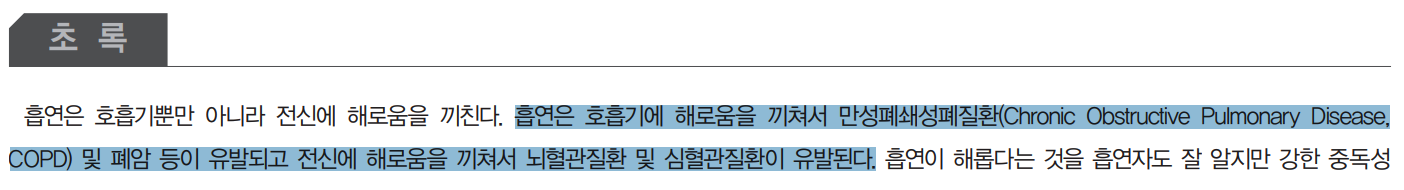

> 실제로 흡연은 만성폐쇄성폐질환 및 폐암 등을 유발하고 뇌혈관질환 및 심혈관질환을 유발한다.

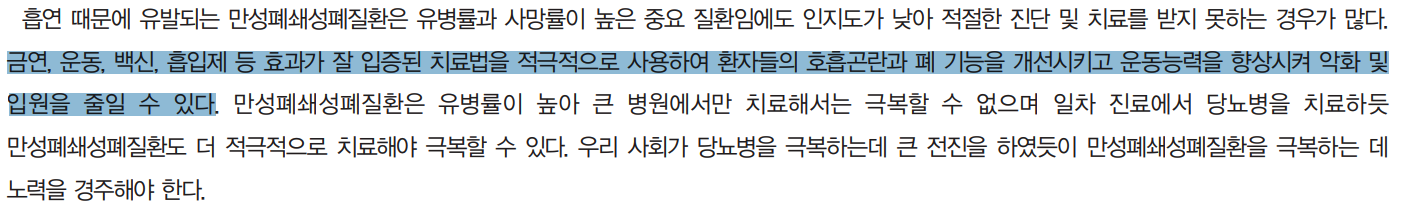

> 따라서 금연, 운동, 백신 등과 같은 효과적인 치료법으로 폐 기능을 개선시키고 운동능력을 향상시키는 것이 중요하다.

### (3) 성별(gender)에 따른 COPD 비율 확인

In [331]:
# gender에 따른 new_copd 도수 확인
copd_gen = copd.loc[:, ['gender', 'new_copd']].value_counts()
copd_gen

gender  new_copd         
1       Mild/Moderate        40
0       Mild/Moderate        26
1       Severe/VerySevere    25
0       Severe/VerySevere    10
Name: count, dtype: int64

In [335]:
copd_g0 = copd_gen.loc[0, 'Severe/VerySevere'] / copd_gen.loc[0].sum()
copd_g1 = copd_gen.loc[1, 'Severe/VerySevere'] / copd_gen.loc[1].sum()

print(f'여성의 copd 중증 비율:{np.round(copd_g0*100, 2)}%')
print(f'남성의 copd 중증 비율:{np.round(copd_g1*100, 2)}%')

여성의 copd 중증 비율:27.78%
남성의 copd 중증 비율:38.46%


> 남성의 copd 중증 비율이 더 높은 것으로 보인다.

### (4) 흡연 상태에 따른 COPD 비율 확인

smoking: 흡연 상태 (1: 현재 끊은 사람, 2: 현재 흡연자)  

In [337]:
# smoking에 따른 new_copd 도수 확인
copd_smok = copd.loc[:, ['smoking', 'new_copd']].value_counts()
copd_smok

smoking  new_copd         
2        Mild/Moderate        54
         Severe/VerySevere    31
1        Mild/Moderate        12
         Severe/VerySevere     4
Name: count, dtype: int64

In [339]:
copd_s1 = copd_smok.loc[1, 'Severe/VerySevere'] / copd_smok.loc[1].sum()
copd_s2 = copd_smok.loc[2, 'Severe/VerySevere'] / copd_smok.loc[2].sum()

print(f'현재 금연한 사람의 copd 중증 비율:{np.round(copd_s1*100, 2)}%')
print(f'현재 흡연 중인 사람의 copd 중증 비율:{np.round(copd_s2*100, 2)}%')

현재 금연한 사람의 copd 중증 비율:25.0%
현재 흡연 중인 사람의 copd 중증 비율:36.47%


### (5) 당뇨병 여부에 따른 COPD 비율 확인

Diabetes: 당뇨병 유무 (1: 있음, 0: 없음)  

In [342]:
# Diabetes에 따른 new_copd 도수 확인
copd_dia = copd.loc[:, ['Diabetes', 'new_copd']].value_counts()
copd_dia

Diabetes  new_copd         
0         Mild/Moderate        55
          Severe/VerySevere    25
1         Mild/Moderate        11
          Severe/VerySevere    10
Name: count, dtype: int64

In [341]:
copd_d0 = copd_dia.loc[0, 'Severe/VerySevere'] / copd_dia.loc[0].sum()
copd_d1 = copd_dia.loc[1, 'Severe/VerySevere'] / copd_dia.loc[1].sum()

print(f'당뇨병이 없는 사람의 copd 중증 비율:{np.round(copd_d0*100, 2)}%')
print(f'당뇨병이 있는 사람의 copd 중증 비율:{np.round(copd_d1*100, 2)}%')

당뇨병이 없는 사람의 copd 중증 비율:31.25%
당뇨병이 있는 사람의 copd 중증 비율:47.62%


### (6) 근육 문제(muscular) 여부에 따른 COPD 비율 확인

muscular: 근육 문제 유무 (1: 있음, 0: 없음)  

In [343]:
# muscular에 따른 new_copd 도수 확인
copd_mus = copd.loc[:, ['muscular', 'new_copd']].value_counts()
copd_mus

muscular  new_copd         
0         Mild/Moderate        54
          Severe/VerySevere    28
1         Mild/Moderate        12
          Severe/VerySevere     7
Name: count, dtype: int64

In [344]:
copd_m0 = copd_mus.loc[0, 'Severe/VerySevere'] / copd_mus.loc[0].sum()
copd_m1 = copd_mus.loc[1, 'Severe/VerySevere'] / copd_mus.loc[1].sum()

print(f'근육 문제가 없는 사람의 copd 중증 비율:{np.round(copd_m0*100, 2)}%')
print(f'근육 문제가 있는 사람의 copd 중증 비율:{np.round(copd_m1*100, 2)}%')

근육 문제가 없는 사람의 copd 중증 비율:34.15%
근육 문제가 있는 사람의 copd 중증 비율:36.84%


### (7) 고혈압(hypertension) 여부에 따른 COPD 비율 확인

hypertension: 고혈압 유무 (1: 있음, 0: 없음)  

In [345]:
# hypertension에 따른 new_copd 도수 확인
copd_hy = copd.loc[:, ['hypertension', 'new_copd']].value_counts()
copd_hy

hypertension  new_copd         
0             Mild/Moderate        60
              Severe/VerySevere    29
1             Mild/Moderate         6
              Severe/VerySevere     6
Name: count, dtype: int64

In [346]:
copd_h0 = copd_hy.loc[0, 'Severe/VerySevere'] / copd_hy.loc[0].sum()
copd_h1 = copd_hy.loc[1, 'Severe/VerySevere'] / copd_hy.loc[1].sum()

print(f'고혈압이 없는 사람의 copd 중증 비율:{np.round(copd_h0*100, 2)}%')
print(f'고혈압이 있는 사람의 copd 중증 비율:{np.round(copd_h1*100, 2)}%')

고혈압이 없는 사람의 copd 중증 비율:32.58%
고혈압이 있는 사람의 copd 중증 비율:50.0%


### (8) 심방세동(AtrialFib) 여부에 따른 COPD 비율 확인
* 심방의 수축이 소실되어 불규칙하게 수축하는 상태

AtrialFib: 심방세동 유무 (1: 있음, 0: 없음)  

In [347]:
# AtrialFib에 따른 new_copd 도수 확인
copd_At = copd.loc[:, ['AtrialFib', 'new_copd']].value_counts()
copd_At

AtrialFib  new_copd         
0          Mild/Moderate        56
           Severe/VerySevere    25
1          Mild/Moderate        10
           Severe/VerySevere    10
Name: count, dtype: int64

In [348]:
copd_A0 = copd_At.loc[0, 'Severe/VerySevere'] / copd_At.loc[0].sum()
copd_A1 = copd_At.loc[1, 'Severe/VerySevere'] / copd_At.loc[1].sum()

print(f'심방세동 없는 사람의 copd 중증 비율:{np.round(copd_A0*100, 2)}%')
print(f'심방세동 있는 사람의 copd 중증 비율:{np.round(copd_A1*100, 2)}%')

심방세동 없는 사람의 copd 중증 비율:30.86%
심방세동 있는 사람의 copd 중증 비율:50.0%
